In [1]:
import sys
import os
os.chdir('..')
sys.path.append('./LIFE')
sys.path.append('./LIFE/core')
from skimage import io
from matplotlib import pyplot as plt
import cv2
import numpy as np
import torch
from flow_estimator import Flow_estimator
from config import get_model_args
from core.utils.utils import image_flow_warp

args = get_model_args()
estimator = Flow_estimator(args)

(<AxesSubplot:title={'center':'source'}>,
 Text(0.5, 1.0, 'source'),
 (-0.5, 771.5, 518.5, -0.5))

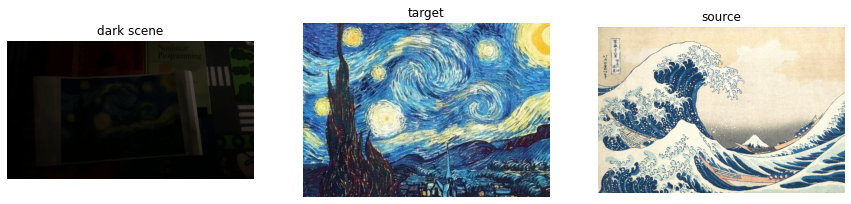

In [2]:
scene_im  = io.imread('./assets/imgs/example.png')
target_im = io.imread('./assets/imgs/the_starry_night.png')
source_im = io.imread('./assets/imgs/great_wave.png')

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(scene_im ), plt.title('dark scene'), plt.axis('off')
plt.subplot(132), plt.imshow(target_im), plt.title('target'), plt.axis('off')
plt.subplot(133), plt.imshow(source_im), plt.title('source'), plt.axis('off')

In [3]:
def blend(im1, im2, im3):
    H, W = 480, 640
    ori_H, ori_W = scene_im.shape[:2]
    im1 = cv2.resize(im1, (W, H))
    im2 = cv2.resize(im2, (W, H))
    im3 = cv2.resize(im3, (W, H))
    flow = estimator.estimate(im1, im2)
    out = image_flow_warp(im3, flow[0].permute([1,2,0]))
    intensity = np.linalg.norm(out, axis=2)
    mask = (intensity == 0)[:,:,np.newaxis]
    blend = (out * (1 - mask) + im1 * mask).astype(np.uint8)
    blend = cv2.resize(blend, (ori_W, ori_H))
    return blend

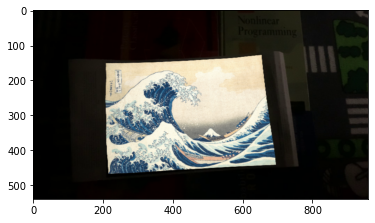

In [4]:
out = blend(scene_im, target_im, source_im)
plt.imshow(out)